# Initial Exploration

Analysing the first 100 years of data available on the Royal Botanic Gardens of Edinburgh from GBIF

In [2]:
import pandas as pd
#df = pd.read_csv("testData_first100Years.csv")
df = pd.read_csv

In [10]:
df.tail()

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,...,recordnumber,identifiedby,license,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue
560,574651306,bf2a4bf0-5f31-11de-b67e-b8a03c50a862,http://data.rbge.org.uk/herb/E00298021,Plantae,Tracheophyta,Magnoliopsida,Gentianales,Gentianaceae,Gentianella,Gentianella campestris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,574650006,bf2a4bf0-5f31-11de-b67e-b8a03c50a862,http://data.rbge.org.uk/herb/E00377934,Plantae,Tracheophyta,Magnoliopsida,Saxifragales,Saxifragaceae,Saxifraga,Saxifraga hypnoides,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,574650005,bf2a4bf0-5f31-11de-b67e-b8a03c50a862,http://data.rbge.org.uk/herb/E00377933,Plantae,Tracheophyta,Magnoliopsida,Saxifragales,Saxifragaceae,Saxifraga,Saxifraga hypnoides,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,574649925,bf2a4bf0-5f31-11de-b67e-b8a03c50a862,http://data.rbge.org.uk/herb/E00298412,Plantae,Tracheophyta,Magnoliopsida,Caryophyllales,Caryophyllaceae,Scleranthus,Scleranthus annuus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Terras,NaN,NaN,NaN,NaN,NaN
564,574646330,bf2a4bf0-5f31-11de-b67e-b8a03c50a862,http://data.rbge.org.uk/herb/E00298655,Plantae,Tracheophyta,Magnoliopsida,Caryophyllales,Caryophyllaceae,Scleranthus,Scleranthus annuus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.shape)
assert (len(df['gbifid'])) == df.shape[0], "Each record should have a unique gbifid"

(565, 44)


Create a dictionary in format { "name" : "parent } (key=name, value=parent),
where name is the taxonomic category and parent is name's encompassing category,
and then export the dictionary to a .CSV for D3.js tree diagram.

In [5]:
print(df.kingdom.unique())
print(str(len(df.kingdom.unique())) + " Kingdom")

['Plantae']
1 Kingdom


In [32]:
phylum_list = df.phylum.unique()
print(phylum_list)
print(str(len(df.phylum.unique())) + " Phyla")
p_k_dict = {}
for p in phylum_list:
    p_k_dict[str(p)] = "Plantae"
print(p_k_dict)
for k in p_k_dict:
    assert p_k_dict[k] == "Plantae", "The values should all be Plantae"

['Tracheophyta' 'Bryophyta' 'Marchantiophyta']
3 Phyla
{'Tracheophyta': 'Plantae', 'Bryophyta': 'Plantae', 'Marchantiophyta': 'Plantae'}


In [31]:
class_list = df['class'].unique()
print(class_list)
print(str(len(df['class'].unique())) + " Classes")
c_p_dict = {}
classes = df['class']
phyla = df['phylum']
for c, p in zip(classes, phyla):
    if c not in c_p_dict:
        c_p_dict[str(c)] = str(p)
print(c_p_dict)
for k in c_p_dict:
    assert c_p_dict[k] in phylum_list, "The values should be a phylum"

['Magnoliopsida' 'Liliopsida' 'Sphagnopsida' 'Jungermanniopsida'
 'Bryopsida' 'Polypodiopsida']
6 Classes
{'Magnoliopsida': 'Tracheophyta', 'Liliopsida': 'Tracheophyta', 'Sphagnopsida': 'Bryophyta', 'Jungermanniopsida': 'Marchantiophyta', 'Bryopsida': 'Bryophyta', 'Polypodiopsida': 'Tracheophyta'}


In [37]:
order_list = df['order'].unique()
print(order_list)
print(str(len(df['order'].unique())) + " Orders")
o_c_dict = {}
classes = df['class']
orders = df['order']
for o, c in zip(orders, classes):
    if o not in o_c_dict:
        o_c_dict[str(o)] = str(c)
print(o_c_dict)

for k in o_c_dict:
    assert o_c_dict[key] in class_list, "The values should be a class"

['Saxifragales' 'Ranunculales' 'Ericales' 'Alismatales' 'Poales' 'Lamiales'
 'Oxalidales' 'Gentianales' 'Caryophyllales' 'Asparagales' 'Sphagnales'
 'Fabales' 'Sapindales' 'Rosales' 'Jungermanniales' 'Polytrichales'
 'Polypodiales' 'Apiales' 'Malpighiales' 'Myrtales' 'Laurales'
 'Aquifoliales' 'Piperales' 'Malvales' 'Asterales' 'Fagales']
26 Orders
{'Saxifragales': 'Magnoliopsida', 'Ranunculales': 'Magnoliopsida', 'Ericales': 'Magnoliopsida', 'Alismatales': 'Liliopsida', 'Poales': 'Liliopsida', 'Lamiales': 'Magnoliopsida', 'Oxalidales': 'Magnoliopsida', 'Gentianales': 'Magnoliopsida', 'Caryophyllales': 'Magnoliopsida', 'Asparagales': 'Liliopsida', 'Sphagnales': 'Sphagnopsida', 'Fabales': 'Magnoliopsida', 'Sapindales': 'Magnoliopsida', 'Rosales': 'Magnoliopsida', 'Jungermanniales': 'Jungermanniopsida', 'Polytrichales': 'Bryopsida', 'Polypodiales': 'Polypodiopsida', 'Apiales': 'Magnoliopsida', 'Malpighiales': 'Magnoliopsida', 'Myrtales': 'Magnoliopsida', 'Laurales': 'Magnoliopsida', 'Aqu

In [45]:
family_list = df['family'].unique()
print(family_list)
print(str(len(df['family'].unique())) + " Families")
f_o_dict = {}
families = df['family']
orders = df['order']
for f, o in zip(families, orders):
    if f not in f_o_dict:
        f_o_dict[str(f)] = str(o)
print(f_o_dict)
for k in f_o_dict:
    assert f_o_dict[k] in order_list

['Saxifragaceae' 'Ranunculaceae' 'Primulaceae' 'Tofieldiaceae' 'Poaceae'
 'Lamiaceae' 'Elaeocarpaceae' 'Gentianaceae' 'Caryophyllaceae'
 'Orchidaceae' 'Sphagnaceae' 'Fabaceae' 'Sapindaceae' 'Ericaceae'
 'Moraceae' 'Scapaniaceae' 'Sapotaceae' 'Polytrichaceae' 'Apocynaceae'
 'Aspleniaceae' 'Apiaceae' 'Salicaceae' 'Loganiaceae' 'Melastomataceae'
 'Myrtaceae' 'Pentaphylacaceae' 'Lauraceae' 'Aquifoliaceae' 'Euphorbiaceae'
 'Pteridaceae' 'Piperaceae' 'Araliaceae' 'Meliaceae' 'Cephaloziaceae'
 'Dipterocarpaceae' 'Asteraceae' 'Fagaceae']
37 Families
{'Saxifragaceae': 'Saxifragales', 'Ranunculaceae': 'Ranunculales', 'Primulaceae': 'Ericales', 'Tofieldiaceae': 'Alismatales', 'Poaceae': 'Poales', 'Lamiaceae': 'Lamiales', 'Elaeocarpaceae': 'Oxalidales', 'Gentianaceae': 'Gentianales', 'Caryophyllaceae': 'Caryophyllales', 'Orchidaceae': 'Asparagales', 'Sphagnaceae': 'Sphagnales', 'Fabaceae': 'Fabales', 'Sapindaceae': 'Sapindales', 'Ericaceae': 'Ericales', 'Moraceae': 'Rosales', 'Scapaniaceae': 'Jung

In [54]:
genus_list = df['genus'].unique()
print(genus_list)
print(str(len(df['genus'].unique())) + " Genuses")
g_f_dict = {}
families = df['family']
genera = df['genus']
for g, f in zip(genera, families):
    if g not in g_f_dict:
        g_f_dict[str(g)] = str(f)
print(g_f_dict)
for k in g_f_dict:
    assert g_f_dict[k] in family_list, "The values should be a family"

['Micranthes' 'Caltha' 'Anemone' 'Saxifraga' 'Helleborus' 'Primula'
 'Tofieldia' 'Clematis' 'Themeda' 'Anisomeles' 'Elaeocarpus' 'Gentianella'
 'Stellaria' 'Ophrys' 'Sphagnum' 'Astragalus' 'Cupaniopsis' 'Conandrium'
 'Scleranthus' 'Lotus' 'Hypopitys' 'Parartocarpus' 'Pyrola' 'Scapania'
 'Planchonella' 'Polytrichum' 'Marsdenia' 'Asplenium' 'Ferulago' 'Casearia'
 'Strychnos' 'Hymenasplenium' 'Creochiton' 'Syzygium' 'Adinandra'
 'Cryptocarya' 'Pleurospermum' 'Ilex' 'Astronia' 'Cinnamomum' 'Macaranga'
 'Lindsayomyrtus' 'Ochrosia' 'Adiantum' 'Ficus' 'Fagraea' 'Sloanea' 'Piper'
 'Polyscias' 'Acalypha' 'Dysoxylum' 'Cephalozia' 'Silene' 'Anisoptera' nan
 'Lithocarpus' 'Rhododendron' 'Endiandra']
58 Genuses
{'Micranthes': 'Saxifragaceae', 'Caltha': 'Ranunculaceae', 'Anemone': 'Ranunculaceae', 'Saxifraga': 'Saxifragaceae', 'Helleborus': 'Ranunculaceae', 'Primula': 'Primulaceae', 'Tofieldia': 'Tofieldiaceae', 'Clematis': 'Ranunculaceae', 'Themeda': 'Poaceae', 'Anisomeles': 'Lamiaceae', 'Elaeocarp

replacing 'nan' with 'Unknown'

In [55]:
for k in g_f_dict:
    if k == 'nan':
        g_f_dict['Unknown'] = g_f_dict.pop(k)
print(g_f_dict)

{'Micranthes': 'Saxifragaceae', 'Caltha': 'Ranunculaceae', 'Anemone': 'Ranunculaceae', 'Saxifraga': 'Saxifragaceae', 'Helleborus': 'Ranunculaceae', 'Primula': 'Primulaceae', 'Tofieldia': 'Tofieldiaceae', 'Clematis': 'Ranunculaceae', 'Themeda': 'Poaceae', 'Anisomeles': 'Lamiaceae', 'Elaeocarpus': 'Elaeocarpaceae', 'Gentianella': 'Gentianaceae', 'Stellaria': 'Caryophyllaceae', 'Ophrys': 'Orchidaceae', 'Sphagnum': 'Sphagnaceae', 'Astragalus': 'Fabaceae', 'Cupaniopsis': 'Sapindaceae', 'Conandrium': 'Primulaceae', 'Scleranthus': 'Caryophyllaceae', 'Lotus': 'Fabaceae', 'Hypopitys': 'Ericaceae', 'Parartocarpus': 'Moraceae', 'Pyrola': 'Ericaceae', 'Scapania': 'Scapaniaceae', 'Planchonella': 'Sapotaceae', 'Polytrichum': 'Polytrichaceae', 'Marsdenia': 'Apocynaceae', 'Asplenium': 'Aspleniaceae', 'Ferulago': 'Apiaceae', 'Casearia': 'Salicaceae', 'Strychnos': 'Loganiaceae', 'Hymenasplenium': 'Aspleniaceae', 'Creochiton': 'Melastomataceae', 'Syzygium': 'Myrtaceae', 'Adinandra': 'Pentaphylacaceae', '

In [58]:
species_list = df['species'].unique()
print(species_list)
print(str(len(df['species'].unique())) + " Species")
s_g_dict = {}
species = df['species']
genera = df['genus']
for s, g in zip(species, genera):
    if s not in s_g_dict:
        s_g_dict[str(s)] = str(g)
print(s_g_dict)
for k in s_g_dict:
    assert s_g_dict[k] in genus_list, "The value for " + k + " should be a genus"

['Micranthes engleri' 'Micranthes stellaris' 'Caltha palustris'
 'Anemone nemorosa' 'Saxifraga aizoides' 'Helleborus viridis'
 'Primula acaulis' 'Tofieldia pusilla' 'Clematis smilacifolia'
 'Clematis graveolens' 'Themeda quadrivalvis' 'Themeda triandra'
 'Themeda anathera' 'Themeda arguens' 'Clematis grata' 'Anisomeles indica'
 'Anisomeles malabarica' 'Elaeocarpus culminicola' 'Gentianella campestris'
 'Stellaria palustris' 'Ophrys sphegodes' 'Sphagnum palustre'
 'Saxifraga hypnoides' 'Astragalus danicus' 'Cupaniopsis curvidens'
 'Conandrium polyanthum' 'Scleranthus annuus' 'Lotus gebelia'
 'Hypopitys monotropa' 'Parartocarpus venenosa' 'Pyrola media'
 'Scapania gracilis' 'Planchonella forbesii' 'Sphagnum papillosum'
 'Polytrichum jensenii' 'Marsdenia lorea' 'Asplenium trichomanes'
 'Ferulago trachycarpa' 'Casearia grewiifolia' 'Strychnos colubrina'
 'Hymenasplenium unilaterale' 'Creochiton novoguineensis'
 'Syzygium fastigiatum' 'Adinandra forbesii' 'Cryptocarya myrcioides'
 'Pleurosp

AssertionError: The value for nan should be a genus

In [59]:
for k in s_g_dict:
    if s_g_dict[k] == 'nan':
        s_g_dict[k] = "Unknown"
    if k == 'nan':
        s_g_dict['Unknown'] = s_g_dict.pop(k)
print(s_g_dict)

{'Micranthes engleri': 'Micranthes', 'Micranthes stellaris': 'Micranthes', 'Caltha palustris': 'Caltha', 'Anemone nemorosa': 'Anemone', 'Saxifraga aizoides': 'Saxifraga', 'Helleborus viridis': 'Helleborus', 'Primula acaulis': 'Primula', 'Tofieldia pusilla': 'Tofieldia', 'Clematis smilacifolia': 'Clematis', 'Clematis graveolens': 'Clematis', 'Themeda quadrivalvis': 'Themeda', 'Themeda triandra': 'Themeda', 'Themeda anathera': 'Themeda', 'Themeda arguens': 'Themeda', 'Clematis grata': 'Clematis', 'Anisomeles indica': 'Anisomeles', 'Anisomeles malabarica': 'Anisomeles', 'Elaeocarpus culminicola': 'Elaeocarpus', 'Gentianella campestris': 'Gentianella', 'Stellaria palustris': 'Stellaria', 'Ophrys sphegodes': 'Ophrys', 'Sphagnum palustre': 'Sphagnum', 'Saxifraga hypnoides': 'Saxifraga', 'Astragalus danicus': 'Astragalus', 'Cupaniopsis curvidens': 'Cupaniopsis', 'Conandrium polyanthum': 'Conandrium', 'Scleranthus annuus': 'Scleranthus', 'Lotus gebelia': 'Lotus', 'Hypopitys monotropa': 'Hypopi

# Export CSV for tree diagram of plant taxonomy

In [70]:
#https://stackoverflow.com/questions/10373247/how-do-i-write-a-python-dictionary-to-a-csv-file
import csv
with open('taxonomy.csv', 'wt') as csvfile:
    w = csv.writer(csvfile)
    w.writerows(p_k_dict.items())
    w.writerows(c_p_dict.items())
    w.writerows(o_c_dict.items())
    w.writerows(f_o_dict.items())
    w.writerows(g_f_dict.items())
    w.writerows(s_g_dict.items())
    

In [67]:
print(df.columns)

Index(['gbifid', 'datasetkey', 'occurrenceid', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificepithet',
       'taxonrank', 'scientificname', 'countrycode', 'locality',
       'publishingorgkey', 'decimallatitude', 'decimallongitude',
       'coordinateuncertaintyinmeters', 'coordinateprecision', 'elevation',
       'elevationaccuracy', 'depth', 'depthaccuracy', 'eventdate', 'day',
       'month', 'year', 'taxonkey', 'specieskey', 'basisofrecord',
       'institutioncode', 'collectioncode', 'catalognumber', 'recordnumber',
       'identifiedby', 'license', 'rightsholder', 'recordedby', 'typestatus',
       'establishmentmeans', 'lastinterpreted', 'mediatype', 'issue'],
      dtype='object')


QUESTIONS

Who is a 'rightsholder'?

What does it mean to have (or not have) a 'license'?

What does 'establishmentmeans' indicate?

Who determined the location coordinates and precision accuracy?

What does 'basisofrecord' mean?

What is 'typestatus'?

What does 'lastinterpreted' record?

What does 'mediatype' record?

What does 'issue' record?

Is 'eventdate' the date a plant was witnessesed or received by RBGE?

What is an 'infraspecificepithet'?

What is a 'taxonrank'?

Is the 'publishingorgkey' associated with RBGE?

In [12]:
print(df['locality'].unique())
print(str(len(df['locality'].unique())) + " Localities")

['foot of Ben Lawers' 'Helvellyn' 'Glen Dole'
 'stream in Glen Cairn [carim?]' 'Ben Lawers' 'west of Killin Station'
 'Ben Voirlich' '200 yards from the junction of Yorkshire' 'Lochnagar'
 'Benmore' 'Ben Ledi' 'Arran' 'Snowdon' 'Lachin y Gair [Lochnagar]'
 'Cader Idnis' 'Ben Leugh [Ben Laoigh?]' 'Ben Nevis' 'near Loch Brandy'
 'Meal da greihdy [Meall na Graidhe]' 'Glen Phee [Fee]'
 'Ben-y-muick-dhui [Ben Macdui]' 'Glen Callater' 'Ben Lomond' 'Glen Rosa'
 'Teesdale' 'Banffshire' 'Summit of Ben Lawers' 'mountains of Clova'
 'Glen Croe between Loch Awe & Loch Lomond. near Rest and be Thankful.' nan
 'Glen Lochy' 'Dollar Law' 'Ochil' 'Glen Candlich - Callater' 'Braeriach'
 'North wales' 'mountains near Llanberis' 'Glencoe' 'Skye' 'The Cheviot'
 'The Ochils' 'Nant Francon' 'Deny-bneathia[?]' 'Deryvoneathia[?!?]'
 'Moel Shabadd [Moel Siabod]' 'Delphi' 'Ben MacDhui' 'Moffat' 'Ben Alder'
 'near Darlington' 'Raby Park [Raby Castle]' "King's Caple" 'Glen Beg'
 'Torc Mountain' 'Balquhidder' 'Kew 

In [51]:
countries = list(df['countrycode'].unique())
print(countries)
print(str(len(countries)) + " Country Codes")
clean_countries = []
for c in countries:
    if type(c) == str:
        clean_countries += [c]
print(clean_countries)
#country_count = list(df.countrycode.value_counts())
#assert len(country_count) == (len(countries) - 1), "There should be a count for every countrycode value that's not nan."

['GB', 'IE', 'IN', 'MU', 'DZ', 'JP', 'AU', 'PG', nan, 'TR', 'GL', 'GR', 'BT', 'JM', 'TT', 'MX', 'CN', 'FI', 'GY', 'PK', 'BR']
21 Country Codes
['GB', 'IE', 'IN', 'MU', 'DZ', 'JP', 'AU', 'PG', 'TR', 'GL', 'GR', 'BT', 'JM', 'TT', 'MX', 'CN', 'FI', 'GY', 'PK', 'BR']


# Creating Subdataframes

In [110]:
phylum_df = df.phylum.value_counts()
phylum_df
phylum_count = []
for p in phylum_list:
    phylum_count += [ phylum_df[p] ]
assert len(phylum_count) == len(phylum_list), "There should be a count value for every phylum."
phylum_df = pd.DataFrame({ 'phylum' : phylum_list, 'totalspecimens' : phylum_count })
phylum_df

,phylum,totalspecimens
0,Tracheophyta,551
1,Bryophyta,11
2,Marchantiophyta,3


In [113]:
class_df = df['class'].value_counts()
class_df
class_count = []
for cl in class_list:
    class_count += [ class_df[cl] ]
assert len(class_count) == len(class_list), "There should be a count value for every class."
class_df = pd.DataFrame({ 'class' : class_list, 'totalspecimens' : class_count })
class_df

,class,totalspecimens
0,Magnoliopsida,460
1,Liliopsida,59
2,Sphagnopsida,10
3,Jungermanniopsida,3
4,Bryopsida,1
5,Polypodiopsida,32


In [114]:
order_df = df['order'].value_counts()
#order_df
order_count = []
for o in order_list:
    order_count += [ order_df[o] ]
assert len(order_count) == len(order_list), "There should be a count value for every order."
order_df = pd.DataFrame({ 'order' : order_list, 'totalspecimens' : order_count })
order_df

,order,totalspecimens
0,Saxifragales,179
1,Ranunculales,73
2,Ericales,63
3,Alismatales,36
4,Poales,14
5,Lamiales,2
6,Oxalidales,2
7,Gentianales,19
8,Caryophyllales,48
9,Asparagales,9


In [85]:
country_df = df.countrycode.value_counts()
country_df.tail()
country_count = []
for c in clean_countries:
    country_count += [ country_df[c] ]
country_df = pd.DataFrame( { 'countrycode' : clean_countries, 'totalspecimens' : country_count })
country_df.head()

,countrycode,totalspecimens
0,GB,456
1,IE,9
2,IN,24
3,MU,1
4,DZ,2


In [98]:
#cc_df = pd.melt(df, id_vars = ['countrycode'], value_vars=['genus', 'species'])
#cc_df.tail()
outsideGB_count = country_count[1:]
outsideGB = clean_countries[1:]
assert len(outsideGB_count) == len(outsideGB), "There should be a count value for every country outside GB"
outsideGB_df = pd.DataFrame( { 'countrycode' : outsideGB, 'totalspecimens' : outsideGB_count })
outsideGB_df.head()

,countrycode,totalspecimens
0,IE,9
1,IN,24
2,MU,1
3,DZ,2
4,JP,2


# Graphing

In [16]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

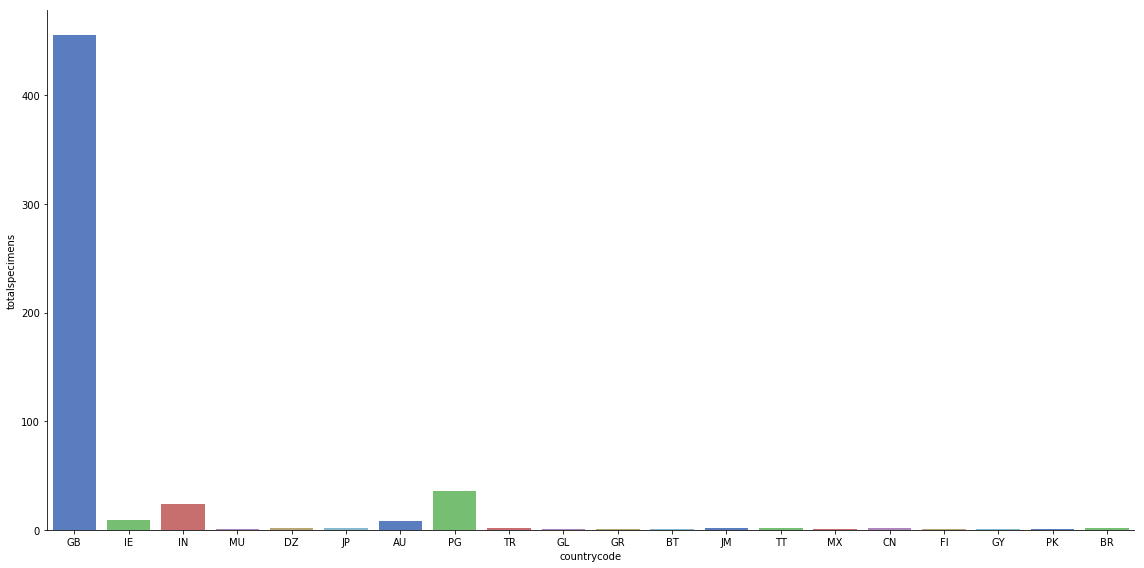

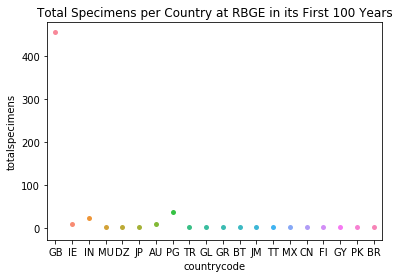

In [66]:
g = sns.factorplot("countrycode", "totalspecimens", data=country_df, kind="bar", palette="muted", size=8, aspect=2, legend=False)
plt.show()

ax = sns.swarmplot(x="countrycode", y="totalspecimens", data=country_df)
ax.set_title("Total Specimens per Country at RBGE in its First 100 Years")
plt.show()

#sns.barplot(x='countrycode', y='totalspecimens', data=country_df, ax=axes[0]).set_title('Specimens per Country')

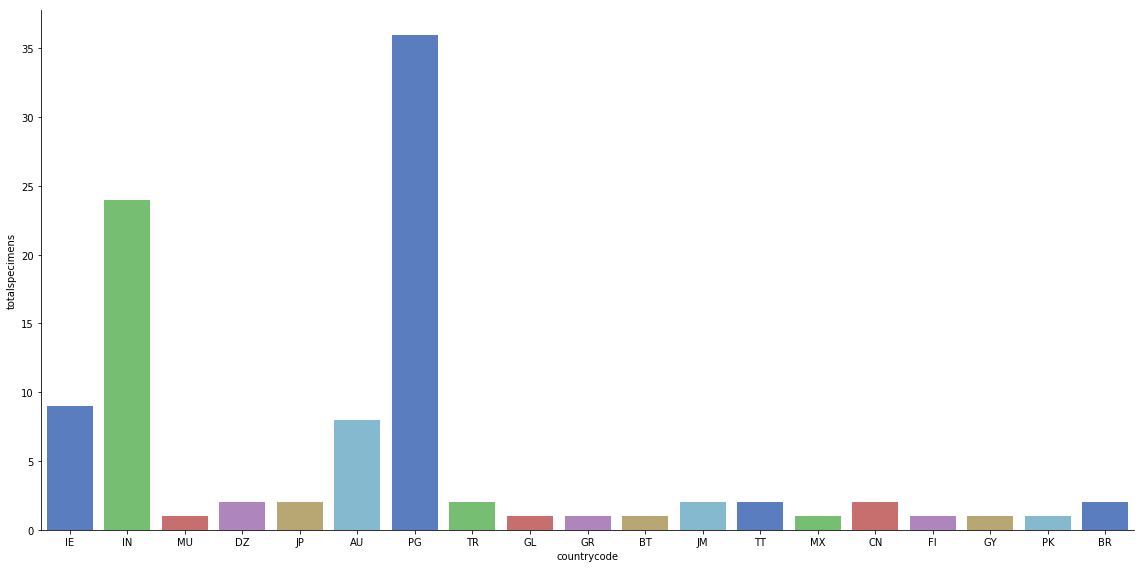

In [99]:
g = sns.factorplot("countrycode", "totalspecimens", data=outsideGB_df, kind="bar", palette="muted", size=8, aspect=2, legend=False)
plt.show()

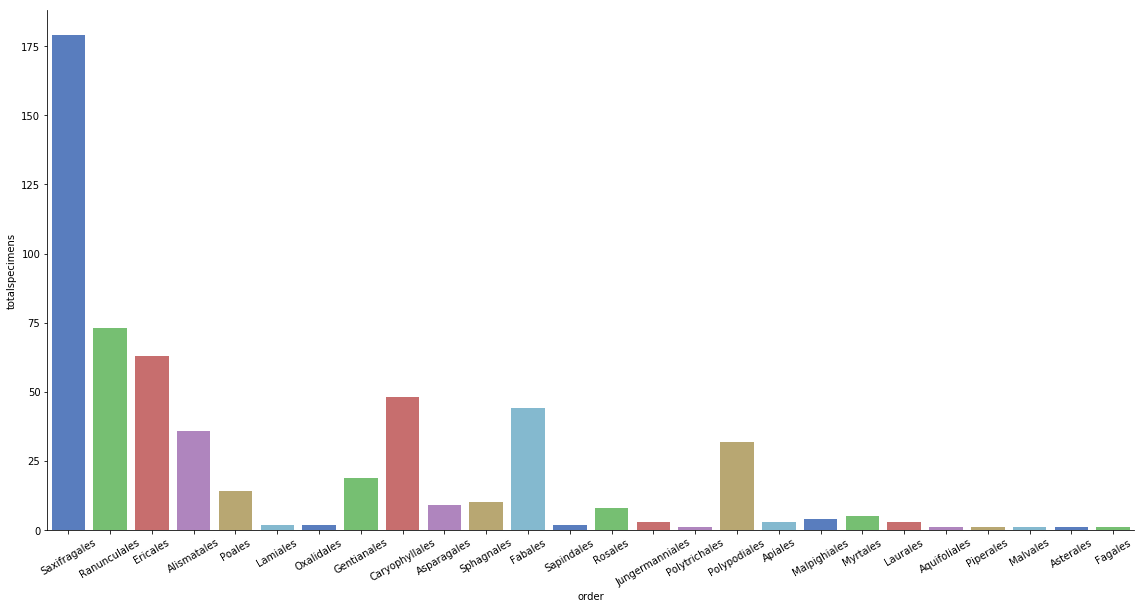

In [116]:
g = sns.factorplot("order", "totalspecimens", data=order_df, kind="bar", palette="muted", size=8, aspect=2, legend=False)
g.set_xticklabels(rotation=30)
plt.show()